# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [5]:
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [ ]:
#EJERCICIO A

In [30]:
#PARTE 1
S=df["solution"]
Sabs=[]
smax=[]
for i in range (0,len(S)):
    k=S[i]
    j=[abs(x) for x in k]
    Sabs.append(j)
for i in range (0,len(Sabs)):
    k1=Sabs[i]
    j1=max(k1)
    smax.append(j1)
    
df['smax']=smax

df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [194]:
#PARTE 2

S1=df["solution"]
suma_s=[]
suma_s3=[]
for i in range (0,len(S1)):       #Ciclo para sumar los elementos de cada lista
    kk=S1[i]
    suma=sum(kk)
    suma_s.append(suma)
df['suma_s']=suma_s


S2=df["suma_s"]
df['suma_s3']=[n**3 for n in S2]     #Elevar al cubo la suma de los elementos de cada lista

df

,l,k,solution,gcd,n,smax,suma_s,suma_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


el número de fila es: 251216
Fila [3, -4, -11, 12, 16, -17, -24, 27, 29, -31]
Polinomio:    9     8      7      6      5      4      3      2
3 x - 4 x - 11 x + 12 x + 16 x - 17 x - 24 x + 27 x + 29 x - 31
[1.89509336 1.23431869 1.        ]
DERIVADA DEL POLINOMIO     8      7      6      5      4      3      2
27 x - 32 x - 77 x + 72 x + 80 x - 68 x - 72 x + 54 x + 29


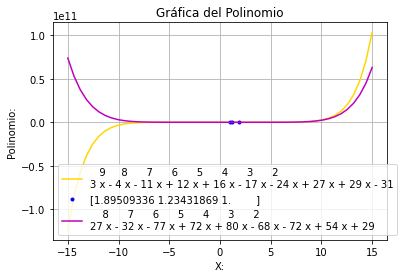

In [184]:
#PARTE 3
k=np.random.seed(1004807437)
k=np.random.randint(0,390073)
print("el número de fila es:",k)  #Fila 

Fila=df.loc[k]['solution']   #lista de coeficientes, fila k y columna solution
print("Fila",Fila)

Poli=np.poly1d(Fila)
print("Polinomio:",Poli) #Crear polinomio con los elementos de la lista

roots=np.roots(Poli)
roots_real = roots[roots.imag==0].real
print(roots_real)


Deriv=Poli.deriv()  #Derivada del polinomio
print("DERIVADA DEL POLINOMIO",Deriv)

#Gráfica de polinomios y sus raices.
x=np.linspace(-15,15)
plt.plot(x, Poli(x), color='gold', label=Poli)                         #Gráfica de polinomios y sus raices.
plt.plot(roots_real, Poli(roots_real), '.', color='blue', label=roots_real)
plt.plot(x, Deriv(x), color='m', label=Deriv)  
plt.title('Gráfica del Polinomio')
plt.ylabel('Polinomio:')
plt.xlabel('X:')
plt.legend()
plt.grid()
plt.show()

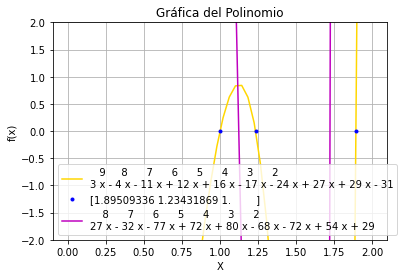

In [188]:
#Gráfica de polinomios, su derivada y sus raices optimizado
x=np.linspace(0,2)
plt.plot(x, Poli(x), color='gold', label=Poli)                         
plt.plot(roots_real, Poli(roots_real), '.', color='blue', label=roots_real)
plt.plot(x, Deriv(x), color='m', label=Deriv) 
plt.title('Gráfica del Polinomio')
plt.ylabel('f(x)')
ymin=-2
ymax=2
plt.ylim(ymin,ymax)
plt.xlabel('X')
plt.legend()
plt.grid()
plt.show()

In [48]:
#EJERCICIO B

In [91]:
#Sacar unnúmero aleatorio y elegir función

alea=np.random.seed(1004807437)
alea=np.random.randint(1,5)
alea

1

In [232]:
#Asignar un número random entre 0 y 1 para p
p=np.random.random()
print("El valor de p es:",p)

#Función
def función(x):
    return x*np.exp(x)-p

El valor de p es: 0.15300538226856553


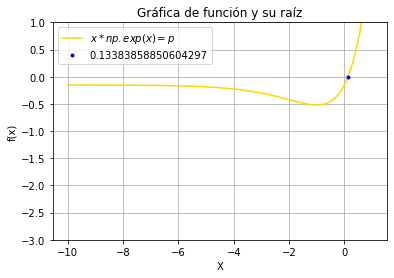

In [241]:
#Usar el método de secante para hallar las raíces.
root=optimize.newton(función, 0, fprime=None, args=(), tol=1.48e-8, maxiter=50000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

#Gráficar función
x=np.linspace(-10,1)
y=función(x)
plt.plot(x,y, color='gold',label='$x*np.exp(x)=p$')
plt.plot(root,función(root),'.', color='b',label=root)
plt.ylabel('f(x)')
plt.xlabel('X')
plt.title('Gráfica de función y su raíz')
plt.ylim(-3,1)
plt.legend()
plt.grid()
plt.show()